# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")


# Load Dataset

In [2]:
train_data = pd.read_csv("train_data.csv")
validation_data = pd.read_csv("validation_data.csv")


# View Data

In [4]:
train_data.head()



,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,28,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Poland,>50K
1,53,Private,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,32,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,49,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,1977,50,South,>50K
4,30,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
validation_data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,41,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
1,33,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
2,28,Private,10th,6,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,47,Private,Assoc-acdm,12,Widowed,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K
4,25,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K


# Dataset Shape 

In [6]:
print("Train shape:", train_data.shape)
print("Validation shape:", validation_data.shape)


Train shape: (11208, 14)
Validation shape: (2240, 14)


# Column Names 

In [7]:
train_data.columns


Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Data Types 

In [11]:
train_data.info()
print("\n")
validation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              11208 non-null  int64 
 1   workclass        11208 non-null  object
 2   education        11208 non-null  object
 3   educational-num  11208 non-null  int64 
 4   marital-status   11208 non-null  object
 5   occupation       11208 non-null  object
 6   relationship     11208 non-null  object
 7   race             11208 non-null  object
 8   gender           11208 non-null  object
 9   capital-gain     11208 non-null  int64 
 10  capital-loss     11208 non-null  int64 
 11  hours-per-week   11208 non-null  int64 
 12  native-country   11208 non-null  object
 13  income           11208 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column 

# Checking Missing Values 

In [12]:
train_data.isnull().sum()



age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
validation_data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Duplicate Check 

In [14]:
train_data.duplicated().sum()

620

In [15]:
validation_data.duplicated().sum()

30

# To remove duplicate values 

In [16]:
train_data = train_data.drop_duplicates()

In [17]:
validation_data = validation_data.drop_duplicates()

In [18]:
train_data.duplicated().sum()

0

In [19]:
validation_data.duplicated().sum()

0

# Target Variable Distribution

In [20]:
train_data["income"].value_counts()


income
<=50K    5393
>50K     5195
Name: count, dtype: int64

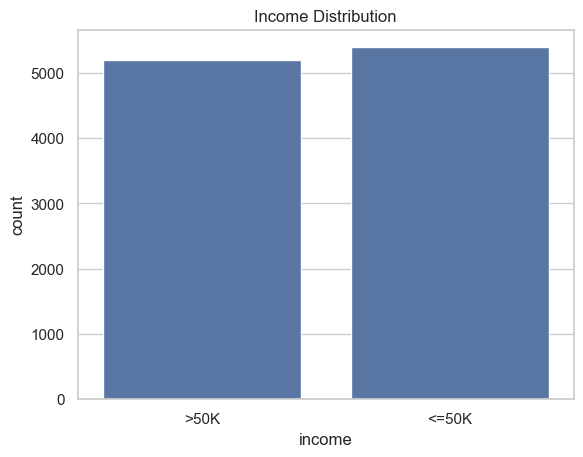

In [21]:
sns.countplot(x="income", data=train_data)
plt.title("Income Distribution")
plt.show()


In [22]:
validation_data["income"].value_counts()

income
<=50K    1109
>50K     1101
Name: count, dtype: int64

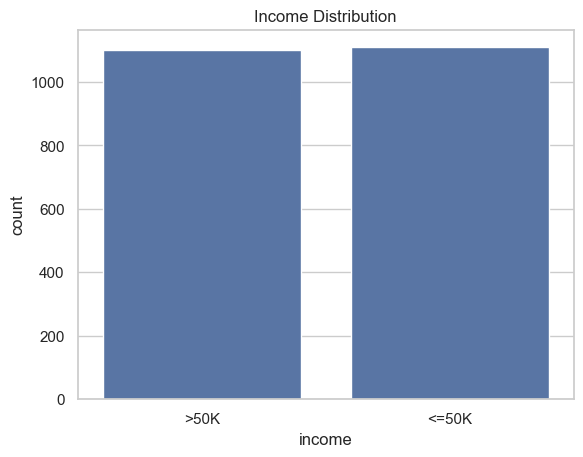

In [23]:
sns.countplot(x="income", data=validation_data)
plt.title("Income Distribution")
plt.show()

# To Identify feature Types 


In [24]:
numerical_features = train_data.select_dtypes(include="int64").columns
categorical_features = train_data.select_dtypes(include="object").drop("income", axis=1).columns


In [26]:
# Statistical Summary

train_data[numerical_features].describe()


,age,educational-num,capital-gain,capital-loss,hours-per-week
count,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000
mean,40.527484,10.629864,2242.847185,133.697866,42.558935
std,12.845769,2.618143,11027.124405,498.379828,11.971599
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,9.000000,0.000000,0.000000,40.000000
50%,40.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,50.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# To analyze one variable EDA 

### Age 

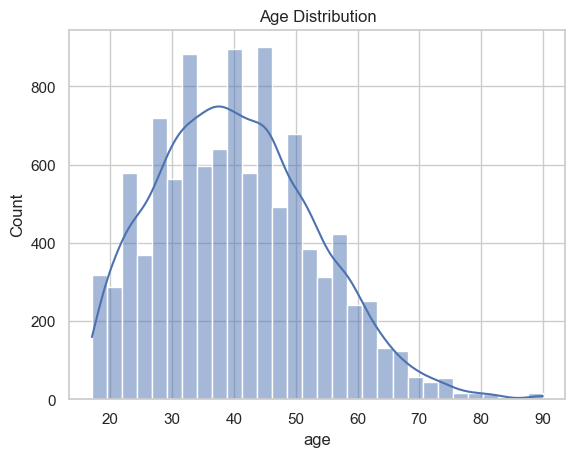

In [29]:
sns.histplot(train_data["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


### Hours per week 

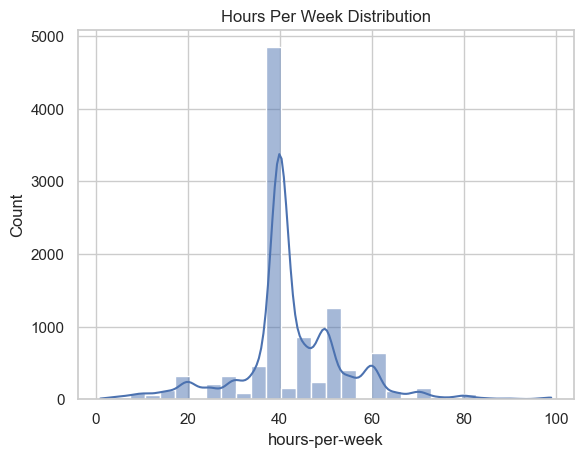

In [30]:
sns.histplot(train_data["hours-per-week"], bins=30, kde=True)
plt.title("Hours Per Week Distribution")
plt.show()


### Capital Gain

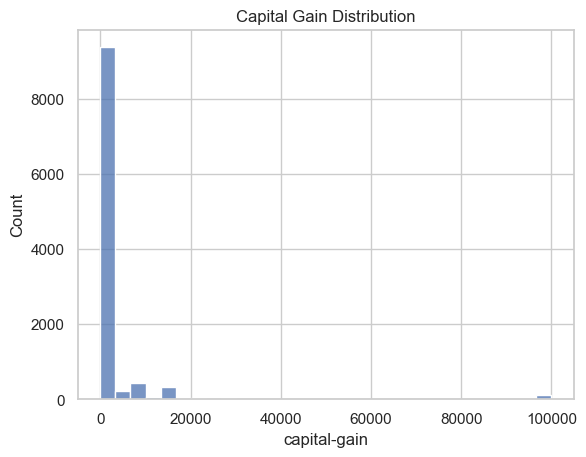

In [31]:
sns.histplot(train_data["capital-gain"], bins=30)
plt.title("Capital Gain Distribution")
plt.show()


### Categorical EDA 

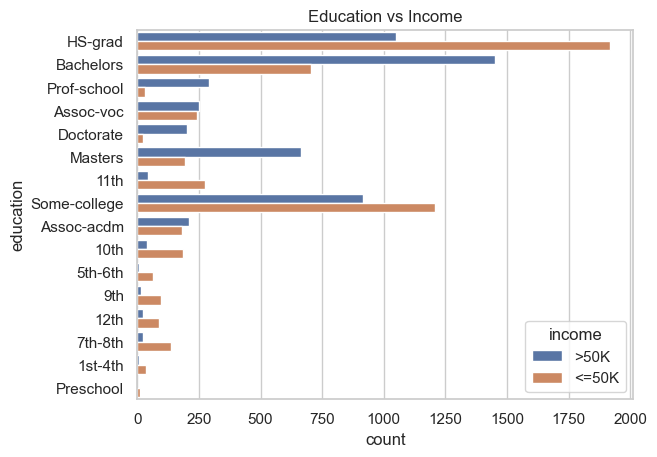

In [32]:
sns.countplot(y="education", hue="income", data=train_data)
plt.title("Education vs Income")
plt.show()


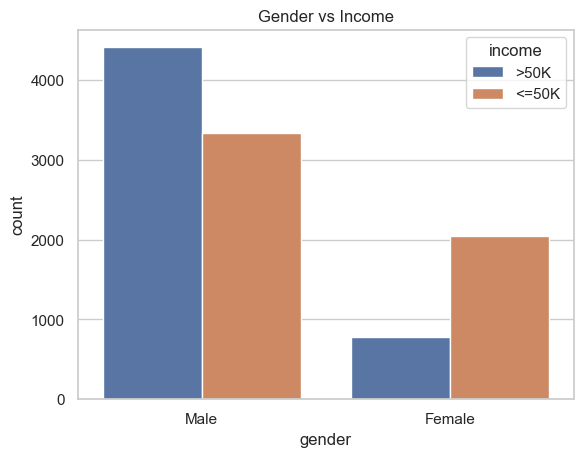

In [33]:
sns.countplot(x="gender", hue="income", data=train_data)
plt.title("Gender vs Income")
plt.show()


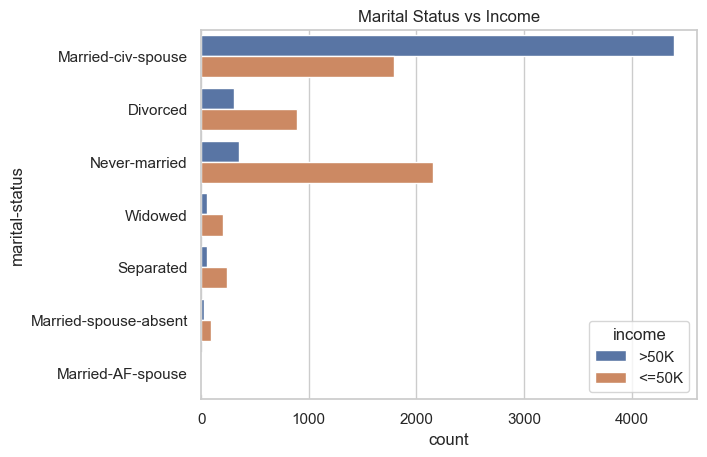

In [34]:
sns.countplot(y="marital-status", hue="income", data=train_data)
plt.title("Marital Status vs Income")
plt.show()


# Correlation Matrix 

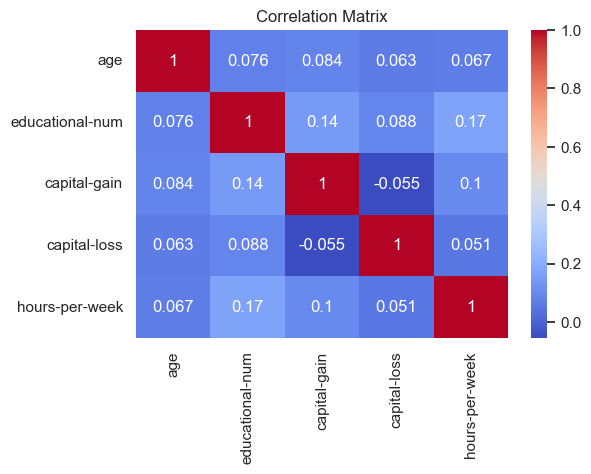

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Skewness check 

In [37]:
train_data[numerical_features].skew()


age                0.432574
educational-num   -0.332091
capital-gain       7.937812
capital-loss       3.576783
hours-per-week     0.350326
dtype: float64

# Log Transformation

In [39]:
train_data["capital-gain"] = np.log1p(train_data["capital-gain"])
train_data["capital-loss"] = np.log1p(train_data["capital-loss"])

validation_data["capital-gain"] = np.log1p(validation_data["capital-gain"])
validation_data["capital-loss"] = np.log1p(validation_data["capital-loss"])


# Split Feature and Target

In [40]:
X_train = train_data.drop("income", axis=1)
y_train = train_data["income"]

X_val = validation_data.drop("income", axis=1)
y_val = validation_data["income"]


### Encode Target 

In [41]:
y_train = y_train.map({"<=50K": 0, ">50K": 1})
y_val = y_val.map({"<=50K": 0, ">50K": 1})


# Preprocessing Pipeline 

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


### Fit and Transform 

In [43]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)


### Model Training 

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)


LogisticRegression(max_iter=1000)

In [45]:
y_pred = model.predict(X_val_processed)
y_prob = model.predict_proba(X_val_processed)[:, 1]


## Classification Report 

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1109
           1       0.80      0.81      0.80      1101

    accuracy                           0.80      2210
   macro avg       0.80      0.80      0.80      2210
weighted avg       0.80      0.80      0.80      2210



### Confusion Matrix 

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
cm


array([[884, 225],
       [214, 887]])

# Confusion Matrix Heatmap

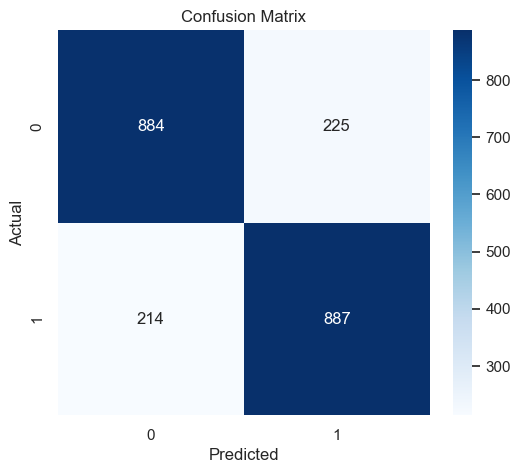

In [48]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ROC-AUC Score 

In [49]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_val, y_prob)
print("ROC–AUC:", auc_score)


ROC–AUC: 0.8868718412394996


# ROC Curve 

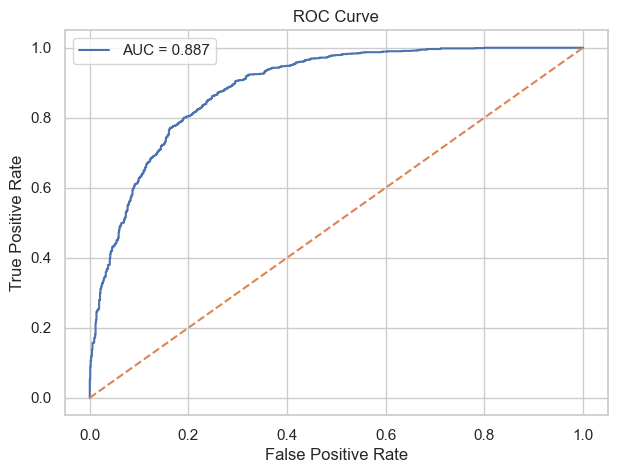

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Support Vector Machine (SVM)

### Train SVM

In [51]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel="rbf",
    probability=True
)

svm_model.fit(X_train_processed, y_train)


SVC(probability=True)

In [52]:
y_pred_svm = svm_model.predict(X_val_processed)
y_prob_svm = svm_model.predict_proba(X_val_processed)[:, 1]


# Classification Report 

In [53]:
from sklearn.metrics import classification_report

print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1109
           1       0.79      0.84      0.81      1101

    accuracy                           0.81      2210
   macro avg       0.81      0.81      0.81      2210
weighted avg       0.81      0.81      0.81      2210



# Confusion Matrix with Heatmap

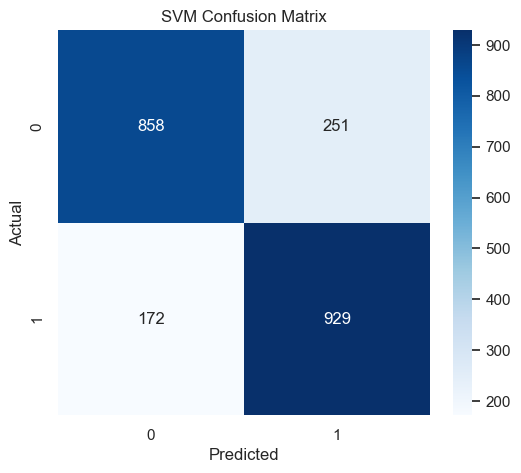

In [54]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_val, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


# ROC-AUC Score 

In [55]:
from sklearn.metrics import roc_auc_score

auc_svm = roc_auc_score(y_val, y_prob_svm)
print("SVM ROC–AUC:", auc_svm)


SVM ROC–AUC: 0.8897759967371247


# ROC Curve

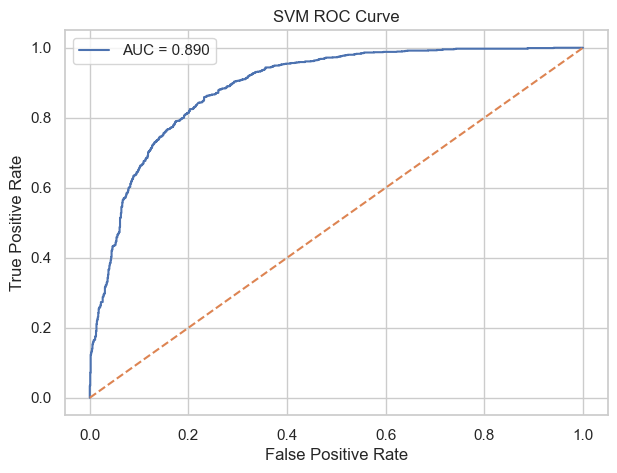

In [56]:
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, _ = roc_curve(y_val, y_prob_svm)

plt.figure(figsize=(7,5))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {auc_svm:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()


# Random Forest

## Train Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train_processed, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [58]:
y_pred_rf = rf_model.predict(X_val_processed)
y_prob_rf = rf_model.predict_proba(X_val_processed)[:, 1]


# Classification Report 

In [60]:
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1109
           1       0.79      0.80      0.80      1101

    accuracy                           0.80      2210
   macro avg       0.80      0.80      0.80      2210
weighted avg       0.80      0.80      0.80      2210



## Confusion Matrix with Heatmap

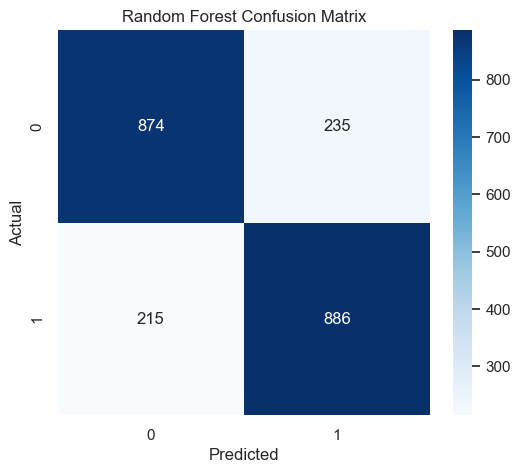

In [61]:
cm_rf = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# ROC-AUC 

In [62]:
auc_rf = roc_auc_score(y_val, y_prob_rf)
print("Random Forest ROC–AUC:", auc_rf)


Random Forest ROC–AUC: 0.886110176092068


# ROC Curve

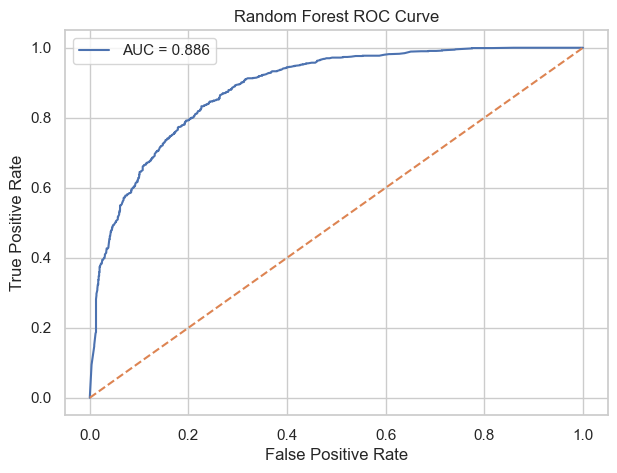

In [63]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()


# Combined ROC Curve 

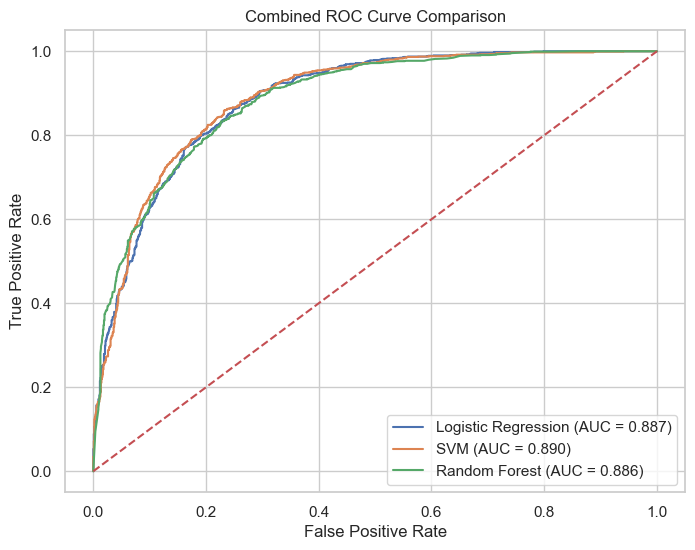

In [64]:
from sklearn.metrics import roc_curve

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_prob)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_prob_svm)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_score:.3f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curve Comparison")
plt.legend()
plt.show()


# Comparison Table of Three Models

In [65]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Support Vector Machine",
        "Random Forest"
    ],
    "Accuracy": [
        model.score(X_val_processed, y_val),
        svm_model.score(X_val_processed, y_val),
        rf_model.score(X_val_processed, y_val)
    ],
    "ROC–AUC": [
        auc_score,
        auc_svm,
        auc_rf
    ]
})

comparison_df


,Model,Accuracy,ROC–AUC
0,Logistic Regression,0.801357,0.886872
1,Support Vector Machine,0.808597,0.889776
2,Random Forest,0.796380,0.886110


# Bar Chart Comparison

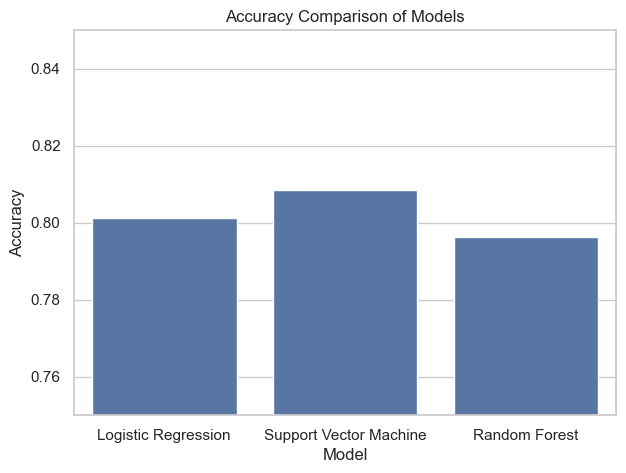

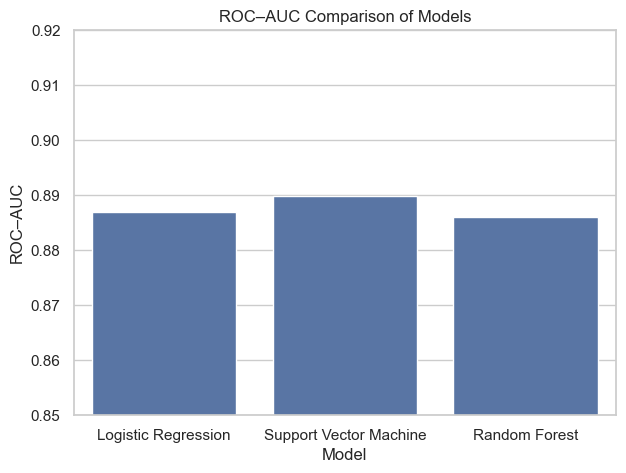

In [66]:
plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Accuracy Comparison of Models")
plt.ylim(0.75, 0.85)
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="ROC–AUC", data=comparison_df)
plt.title("ROC–AUC Comparison of Models")
plt.ylim(0.85, 0.92)
plt.show()
